# 图像分类

在此项目中，你将对 [CIFAR-10 数据集](https://www.cs.toronto.edu/~kriz/cifar.html) 中的图片进行分类。该数据集包含飞机、猫狗和其他物体。你需要预处理这些图片，然后用所有样本训练一个卷积神经网络。图片需要标准化（normalized），标签需要采用 one-hot 编码。你需要应用所学的知识构建卷积的、最大池化（max pooling）、丢弃（dropout）和完全连接（fully connected）的层。最后，你需要在样本图片上看到神经网络的预测结果。


## 获取数据

请运行以下单元，以下载 [CIFAR-10 数据集（Python版）](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)。


In [25]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!

## 探索数据

该数据集分成了几部分／批次（batches），以免你的机器在计算时内存不足。CIFAR-10 数据集包含 5 个部分，名称分别为 `data_batch_1`、`data_batch_2`，以此类推。每个部分都包含以下某个类别的标签和图片：

* 飞机
* 汽车
* 鸟类
* 猫
* 鹿
* 狗
* 青蛙
* 马
* 船只
* 卡车

了解数据集也是对数据进行预测的必经步骤。你可以通过更改 `batch_id` 和 `sample_id` 探索下面的代码单元。`batch_id` 是数据集一个部分的 ID（1 到 5）。`sample_id` 是该部分中图片和标签对（label pair）的 ID。

问问你自己：“可能的标签有哪些？”、“图片数据的值范围是多少？”、“标签是按顺序排列，还是随机排列的？”。思考类似的问题，有助于你预处理数据，并使预测结果更准确。



Stats of batch 1:

Samples: 10000

Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}

First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]


Example of Image 5:

Image - Min Value: 0 Max Value: 252

Image - Shape: (32, 32, 3)

Label - Label Id: 1 Name: automobile

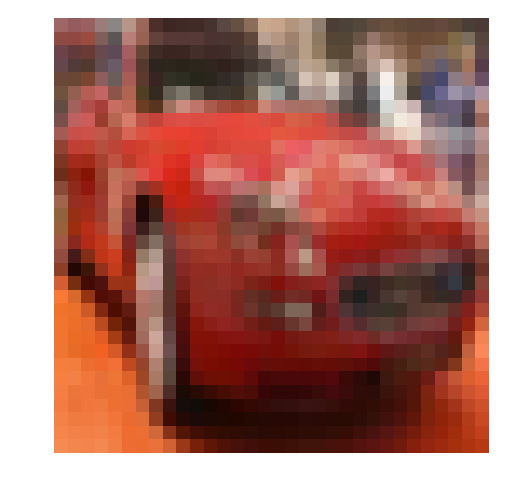

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## 实现预处理函数

### 标准化

在下面的单元中，实现 `normalize` 函数，传入图片数据 `x`，并返回标准化 Numpy 数组。值应该在 0 到 1 的范围内（含 0 和 1）。返回对象应该和 `x` 的形状一样。


In [27]:
import numpy as np


def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    result = np.array(x, dtype=np.float32) / 255
    return result


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed

### One-hot 编码

和之前的代码单元一样，你将为预处理实现一个函数。这次，你将实现 `one_hot_encode` 函数。输入，也就是 `x`，是一个标签列表。实现该函数，以返回为 one_hot 编码的 Numpy 数组的标签列表。标签的可能值为 0 到 9。每次调用 `one_hot_encode` 时，对于每个值，one_hot 编码函数应该返回相同的编码。确保将编码映射保存到该函数外面。

提示：不要重复发明轮子。


In [28]:
from sklearn.preprocessing import LabelBinarizer

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    label_binarizer = LabelBinarizer() 
    label_binarizer.fit(range(10))
    return label_binarizer.transform(x)
    
    # x_size = len(x)
    # x_max = 10  # 这里不使用 max(x) + 1,为了防止测试样本中没有最大值
    # result = np.zeros((x_size, x_max), dtype=int)
    # result[np.arange(x_size), x] = 1
    # 
    # return result
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed

### 随机化数据

之前探索数据时，你已经了解到，样本的顺序是随机的。再随机化一次也不会有什么关系，但是对于这个数据集没有必要。


## 预处理所有数据并保存

运行下方的代码单元，将预处理所有 CIFAR-10 数据，并保存到文件中。下面的代码还使用了 10% 的训练数据，用来验证。


In [29]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# 检查点

这是你的第一个检查点。如果你什么时候决定再回到该记事本，或需要重新启动该记事本，你可以从这里开始。预处理的数据已保存到本地。


In [30]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## 构建网络

对于该神经网络，你需要将每层都构建为一个函数。你看到的大部分代码都位于函数外面。要更全面地测试你的代码，我们需要你将每层放入一个函数中。这样使我们能够提供更好的反馈，并使用我们的统一测试检测简单的错误，然后再提交项目。

>**注意**：如果你觉得每周很难抽出足够的时间学习这门课程，我们为此项目提供了一个小捷径。对于接下来的几个问题，你可以使用 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 程序包中的类来构建每个层级，但是“卷积和最大池化层级”部分的层级除外。TF Layers 和 Keras 及 TFLearn 层级类似，因此很容易学会。

>但是，如果你想充分利用这门课程，请尝试自己解决所有问题，不使用 TF Layers 程序包中的任何类。你依然可以使用其他程序包中的类，这些类和你在 TF Layers 中的类名称是一样的！例如，你可以使用 TF Neural Network 版本的 `conv2d` 类 [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)，而不是 TF Layers 版本的 `conv2d` 类 [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d)。

我们开始吧！


### 输入

神经网络需要读取图片数据、one-hot 编码标签和丢弃保留概率（dropout keep probability）。请实现以下函数：

* 实现 `neural_net_image_input`
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * 使用 `image_shape` 设置形状，部分大小设为 `None`
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 TensorFlow `name` 参数对 TensorFlow 占位符 "x" 命名
* 实现 `neural_net_label_input`
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * 使用 `n_classes` 设置形状，部分大小设为 `None`
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 TensorFlow `name` 参数对 TensorFlow 占位符 "y" 命名
* 实现 `neural_net_keep_prob_input`
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)，用于丢弃保留概率
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 TensorFlow `name` 参数对 TensorFlow 占位符 "keep_prob" 命名

这些名称将在项目结束时，用于加载保存的模型。

注意：TensorFlow 中的 `None` 表示形状可以是动态大小。

In [31]:
import tensorflow as tf


def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, [None, image_shape[0], image_shape[1], image_shape[2]], 'x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, [None, n_classes], 'y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)


Image Input Tests Passed.

Label Input Tests Passed.

Keep Prob Tests Passed.

### 卷积和最大池化层

卷积层级适合处理图片。对于此代码单元，你应该实现函数 `conv2d_maxpool` 以便应用卷积然后进行最大池化：

* 使用 `conv_ksize`、`conv_num_outputs` 和 `x_tensor` 的形状创建权重（weight）和偏置（bias）。
* 使用权重和 `conv_strides` 对 `x_tensor` 应用卷积。
 * 建议使用我们建议的间距（padding），当然也可以使用任何其他间距。
* 添加偏置
* 向卷积中添加非线性激活（nonlinear activation）
* 使用 `pool_ksize` 和 `pool_strides` 应用最大池化
 * 建议使用我们建议的间距（padding），当然也可以使用任何其他间距。

**注意**：对于**此层**，**请勿使用** [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers)，但是仍然可以使用 TensorFlow 的 [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) 包。对于所有**其他层**，你依然可以使用快捷方法。


In [32]:


def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # 使用 `conv_ksize`、`conv_num_outputs` 和 `x_tensor` 的形状创建权重（weight）和偏置（bias）。
    
    stddev = 1/np.sqrt(conv_ksize[0] * conv_ksize[1] * x_tensor.get_shape().as_list()[3])
    weight = tf.Variable(tf.truncated_normal([conv_ksize[0], conv_ksize[1],
                                              x_tensor.get_shape().as_list()[3], conv_num_outputs], 0.0, stddev))
    bias = tf.Variable(tf.zeros(conv_num_outputs), tf.float32)
    
    # 使用权重和 `conv_strides` 对 `x_tensor` 应用卷积
    conv_layer = tf.nn.conv2d(x_tensor, weight, 
                              strides=[1, conv_strides[0], conv_strides[1], 1], 
                              padding='SAME')
    
    # 添加偏置
    conv_layer = tf.nn.bias_add(conv_layer, bias)

    # 使用 `pool_ksize` 和 `pool_strides` 应用最大池化
    conv_layer = tf.nn.max_pool(conv_layer, 
                                ksize=[1, pool_ksize[0], pool_ksize[1], 1], 
                                strides=[1, pool_strides[0], pool_strides[1], 1],
                                padding='SAME')
    
    # 向卷积中添加非线性激活（nonlinear activation）
    conv_layer = tf.nn.relu(conv_layer)
    return conv_layer 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed

### 扁平化层

实现 `flatten` 函数，将 `x_tensor` 的维度从四维张量（4-D tensor）变成二维张量。输出应该是形状（*部分大小（Batch Size）*，*扁平化图片大小（Flattened Image Size）*）。快捷方法：对于此层，你可以使用 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的类。如果你想要更大挑战，可以仅使用其他 TensorFlow 程序包。


In [33]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    origin_size = x_tensor.get_shape().as_list()
    return tf.reshape(x_tensor, [-1, origin_size[1]*origin_size[2]*origin_size[3]])


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed

### 全连接层

实现 `fully_conn` 函数，以向 `x_tensor` 应用完全连接的层级，形状为（*部分大小（Batch Size）*，*num_outputs*）。快捷方法：对于此层，你可以使用 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的类。如果你想要更大挑战，可以仅使用其他 TensorFlow 程序包。

In [34]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # 设置数据的权重
    input_count = x_tensor.get_shape().as_list()[1]
    weight = tf.Variable(tf.truncated_normal([input_count, num_outputs], 0.0, 1/np.sqrt(input_count)))
    bias = tf.Variable(tf.zeros(num_outputs), tf.float32)
    
    # 创建全连接网络层
    fc1 = tf.add(tf.matmul(x_tensor, weight), bias)
    fc1 = tf.nn.relu(fc1)
    
    return fc1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed

### 输出层

实现 `output` 函数，向 x_tensor 应用完全连接的层级，形状为（*部分大小（Batch Size）*，*num_outputs*）。快捷方法：对于此层，你可以使用 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的类。如果你想要更大挑战，可以仅使用其他 TensorFlow 程序包。

**注意**：该层级不应应用 Activation、softmax 或交叉熵（cross entropy）。

In [35]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    weight = tf.Variable(tf.truncated_normal([x_tensor.get_shape().as_list()[1], num_outputs],
                                             0.0, 1/np.sqrt(num_outputs)))
    bias = tf.Variable(tf.zeros(num_outputs), tf.float32)
    
    # 创建全连接网络层
    fc1 = tf.add(tf.matmul(x_tensor, weight), bias)
    
    return fc1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed

### 创建卷积模型

实现函数 `conv_net`， 创建卷积神经网络模型。该函数传入一批图片 `x`，并输出对数（logits）。使用你在上方创建的层创建此模型：

* 应用 1、2 或 3 个卷积和最大池化层（Convolution and Max Pool layers）
* 应用一个扁平层（Flatten Layer）
* 应用 1、2 或 3 个完全连接层（Fully Connected Layers）
* 应用一个输出层（Output Layer）
* 返回输出
* 使用 `keep_prob` 向模型中的一个或多个层应用 [TensorFlow 的 Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout)

In [36]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    layer_num_outputs = [32, 32, 32]
    conv_ksizes = [[5, 5], [3, 3], [5, 5]]
    conv_strides = [[1, 1], [1, 1], [1, 1]]
    pool_ksizes = [[2, 2], [2, 2], [2, 2]]
    pool_strides = [[2, 2], [2, 2], [2, 2]]
    
    con = conv2d_maxpool(x, layer_num_outputs[0], conv_ksizes[0], conv_strides[0], pool_ksizes[0], pool_strides[0])
    con = conv2d_maxpool(con, layer_num_outputs[1], conv_ksizes[1], conv_strides[1], pool_ksizes[1], 
                         pool_strides[1])
    # con = conv2d_maxpool(con, layer_num_outputs[2], conv_ksizes[2], conv_strides[2], pool_ksizes[2], 
    #                         pool_strides[2])
    con = tf.nn.dropout(con, keep_prob)
    
    # Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    flattened_tensor = flatten(con)

    # Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    f_num_outpus = [128, 64, 256]
    fnn = fully_conn(flattened_tensor, f_num_outpus[0])
    fnn = tf.nn.dropout(fnn, keep_prob)
    fnn = fully_conn(fnn, f_num_outpus[1])
    fnn = tf.nn.dropout(fnn, keep_prob)
    # fnn = fully_conn(fnn, f_num_outpus[2])
    # fnn = tf.nn.dropout(fnn, keep_prob)
    
    
    # Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    return output(fnn, 10)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!

## 训练神经网络

### 单次优化

实现函数 `train_neural_network` 以进行单次优化（single optimization）。该优化应该使用 `optimizer` 优化 `session`，其中 `feed_dict` 具有以下参数：

* `x` 表示图片输入
* `y` 表示标签
* `keep_prob` 表示丢弃的保留率

每个部分都会调用该函数，所以 `tf.global_variables_initializer()` 已经被调用。

注意：不需要返回任何内容。该函数只是用来优化神经网络。


In [37]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # session.run(tf.global_variables_initializer())
    session.run(optimizer, feed_dict={
                x: feature_batch,
                y: label_batch,
                keep_prob: keep_probability})
            

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed

### 显示数据

实现函数 `print_stats` 以输出损失和验证准确率。使用全局变量 `valid_features` 和 `valid_labels` 计算验证准确率。使用保留率 `1.0` 计算损失和验证准确率（loss and validation accuracy）。


In [38]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    
    # 打印训练集的数据主要是为了评估模型是欠拟合还是过拟合
    train_batch_accuracy = session.run(accuracy, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: 1})
    train_batch_cost = session.run(cost, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: 1})
    
    validation_accuracy = session.run(accuracy, feed_dict={
        x: valid_features,
        y: valid_labels,
        keep_prob: 1})
    validation_cost = session.run(cost, feed_dict={
        x: valid_features,
        y: valid_labels,
        keep_prob: 1})
    
    # 打印训练集的数据主要是为了评估模型是欠拟合还是过拟合
    print('validation_cost:' + str(validation_cost) + ",validation_accuracy:" + str(validation_accuracy) +
          ",train_batch_cost:" + str(train_batch_cost) + ",train_batch_accuracy" + str(train_batch_accuracy))


### 超参数

调试以下超参数：
* 设置 `epochs` 表示神经网络停止学习或开始过拟合的迭代次数
* 设置 `batch_size`，表示机器内存允许的部分最大体积。大部分人设为以下常见内存大小：

 * 64
 * 128
 * 256
 * ...
* 设置 `keep_probability` 表示使用丢弃时保留节点的概率

In [39]:
# TODO: Tune Parameters
epochs = 40
batch_size = 256
keep_probability = 0.50

### 在单个 CIFAR-10 部分上训练

我们先用单个部分，而不是用所有的 CIFAR-10 批次训练神经网络。这样可以节省时间，并对模型进行迭代，以提高准确率。最终验证准确率达到 50% 或以上之后，在下一部分对所有数据运行模型。


In [40]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...

Epoch  1, CIFAR-10 Batch 1:  

validation_cost:2.06264,validation_accuracy:0.2692,train_batch_cost:2.16392,train_batch_accuracy0.2

Epoch  2, CIFAR-10 Batch 1:  

validation_cost:1.87218,validation_accuracy:0.3304,train_batch_cost:1.99344,train_batch_accuracy0.3

Epoch  3, CIFAR-10 Batch 1:  

validation_cost:1.79545,validation_accuracy:0.3558,train_batch_cost:1.90001,train_batch_accuracy0.375

Epoch  4, CIFAR-10 Batch 1:  

validation_cost:1.64927,validation_accuracy:0.4228,train_batch_cost:1.74387,train_batch_accuracy0.45

Epoch  5, CIFAR-10 Batch 1:  

validation_cost:1.57946,validation_accuracy:0.429,train_batch_cost:1.57728,train_batch_accuracy0.45

Epoch  6, CIFAR-10 Batch 1:  

validation_cost:1.50792,validation_accuracy:0.4566,train_batch_cost:1.44466,train_batch_accuracy0.525

Epoch  7, CIFAR-10 Batch 1:  

validation_cost:1.4643,validation_accuracy:0.4796,train_batch_cost:1.36407,train_batch_accuracy0.55

Epoch  8, CIFAR-10 Batch 1:  

validation_cost:1.41652,validation_accuracy:0.5052,train_batch_cost:1.23477,train_batch_accuracy0.6

Epoch  9, CIFAR-10 Batch 1:  

validation_cost:1.44792,validation_accuracy:0.4826,train_batch_cost:1.23105,train_batch_accuracy0.625

Epoch 10, CIFAR-10 Batch 1:  

validation_cost:1.35526,validation_accuracy:0.5178,train_batch_cost:1.04294,train_batch_accuracy0.725

Epoch 11, CIFAR-10 Batch 1:  

validation_cost:1.33157,validation_accuracy:0.5338,train_batch_cost:0.999871,train_batch_accuracy0.675

Epoch 12, CIFAR-10 Batch 1:  

validation_cost:1.32799,validation_accuracy:0.5296,train_batch_cost:0.974018,train_batch_accuracy0.725

Epoch 13, CIFAR-10 Batch 1:  

validation_cost:1.28718,validation_accuracy:0.546,train_batch_cost:0.863609,train_batch_accuracy0.675

Epoch 14, CIFAR-10 Batch 1:  

validation_cost:1.30859,validation_accuracy:0.5344,train_batch_cost:0.886325,train_batch_accuracy0.725

Epoch 15, CIFAR-10 Batch 1:  

validation_cost:1.25046,validation_accuracy:0.5548,train_batch_cost:0.754017,train_batch_accuracy0.725

Epoch 16, CIFAR-10 Batch 1:  

validation_cost:1.22313,validation_accuracy:0.5698,train_batch_cost:0.735974,train_batch_accuracy0.75

Epoch 17, CIFAR-10 Batch 1:  

validation_cost:1.22143,validation_accuracy:0.5674,train_batch_cost:0.679111,train_batch_accuracy0.775

Epoch 18, CIFAR-10 Batch 1:  

validation_cost:1.28185,validation_accuracy:0.5498,train_batch_cost:0.698436,train_batch_accuracy0.8

Epoch 19, CIFAR-10 Batch 1:  

validation_cost:1.20399,validation_accuracy:0.5802,train_batch_cost:0.632527,train_batch_accuracy0.775

Epoch 20, CIFAR-10 Batch 1:  

validation_cost:1.20909,validation_accuracy:0.5728,train_batch_cost:0.607872,train_batch_accuracy0.775

Epoch 21, CIFAR-10 Batch 1:  

validation_cost:1.25406,validation_accuracy:0.5638,train_batch_cost:0.609784,train_batch_accuracy0.775

Epoch 22, CIFAR-10 Batch 1:  

validation_cost:1.1759,validation_accuracy:0.587,train_batch_cost:0.561999,train_batch_accuracy0.8

Epoch 23, CIFAR-10 Batch 1:  

validation_cost:1.18107,validation_accuracy:0.5864,train_batch_cost:0.536767,train_batch_accuracy0.825

Epoch 24, CIFAR-10 Batch 1:  

validation_cost:1.2242,validation_accuracy:0.5694,train_batch_cost:0.556607,train_batch_accuracy0.825

Epoch 25, CIFAR-10 Batch 1:  

validation_cost:1.18476,validation_accuracy:0.5876,train_batch_cost:0.514145,train_batch_accuracy0.85

Epoch 26, CIFAR-10 Batch 1:  

validation_cost:1.1495,validation_accuracy:0.595,train_batch_cost:0.47316,train_batch_accuracy0.825

Epoch 27, CIFAR-10 Batch 1:  

validation_cost:1.18856,validation_accuracy:0.593,train_batch_cost:0.475472,train_batch_accuracy0.875

Epoch 28, CIFAR-10 Batch 1:  

validation_cost:1.17178,validation_accuracy:0.5858,train_batch_cost:0.436307,train_batch_accuracy0.9

Epoch 29, CIFAR-10 Batch 1:  

validation_cost:1.17278,validation_accuracy:0.586,train_batch_cost:0.396051,train_batch_accuracy0.925

Epoch 30, CIFAR-10 Batch 1:  

validation_cost:1.15036,validation_accuracy:0.5938,train_batch_cost:0.392027,train_batch_accuracy0.925

Epoch 31, CIFAR-10 Batch 1:  

validation_cost:1.17734,validation_accuracy:0.5836,train_batch_cost:0.421853,train_batch_accuracy0.9

Epoch 32, CIFAR-10 Batch 1:  

validation_cost:1.17087,validation_accuracy:0.5882,train_batch_cost:0.393508,train_batch_accuracy0.9

Epoch 33, CIFAR-10 Batch 1:  

validation_cost:1.15779,validation_accuracy:0.5928,train_batch_cost:0.376809,train_batch_accuracy0.925

Epoch 34, CIFAR-10 Batch 1:  

validation_cost:1.13333,validation_accuracy:0.6014,train_batch_cost:0.35372,train_batch_accuracy0.95

Epoch 35, CIFAR-10 Batch 1:  

validation_cost:1.11437,validation_accuracy:0.6066,train_batch_cost:0.338754,train_batch_accuracy0.95

Epoch 36, CIFAR-10 Batch 1:  

validation_cost:1.13285,validation_accuracy:0.6056,train_batch_cost:0.299233,train_batch_accuracy0.975

Epoch 37, CIFAR-10 Batch 1:  

validation_cost:1.10469,validation_accuracy:0.6066,train_batch_cost:0.28004,train_batch_accuracy0.95

Epoch 38, CIFAR-10 Batch 1:  

validation_cost:1.19512,validation_accuracy:0.5868,train_batch_cost:0.319726,train_batch_accuracy0.925

Epoch 39, CIFAR-10 Batch 1:  

validation_cost:1.13175,validation_accuracy:0.607,train_batch_cost:0.273195,train_batch_accuracy0.975

Epoch 40, CIFAR-10 Batch 1:  

validation_cost:1.0973,validation_accuracy:0.615,train_batch_cost:0.265359,train_batch_accuracy0.95

### 完全训练模型

现在，单个 CIFAR-10 部分的准确率已经不错了，试试所有五个部分吧。

In [41]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...

Epoch  1, CIFAR-10 Batch 1:  

validation_cost:2.13471,validation_accuracy:0.227,train_batch_cost:2.16198,train_batch_accuracy0.25

Epoch  1, CIFAR-10 Batch 2:  

validation_cost:1.93097,validation_accuracy:0.3306,train_batch_cost:2.0164,train_batch_accuracy0.325

Epoch  1, CIFAR-10 Batch 3:  

validation_cost:1.86148,validation_accuracy:0.3392,train_batch_cost:1.81076,train_batch_accuracy0.3

Epoch  1, CIFAR-10 Batch 4:  

validation_cost:1.72201,validation_accuracy:0.389,train_batch_cost:1.76471,train_batch_accuracy0.375

Epoch  1, CIFAR-10 Batch 5:  

validation_cost:1.65329,validation_accuracy:0.413,train_batch_cost:1.68565,train_batch_accuracy0.45

Epoch  2, CIFAR-10 Batch 1:  

validation_cost:1.57454,validation_accuracy:0.446,train_batch_cost:1.76106,train_batch_accuracy0.475

Epoch  2, CIFAR-10 Batch 2:  

validation_cost:1.4977,validation_accuracy:0.4746,train_batch_cost:1.54602,train_batch_accuracy0.5

Epoch  2, CIFAR-10 Batch 3:  

validation_cost:1.48783,validation_accuracy:0.4706,train_batch_cost:1.3642,train_batch_accuracy0.525

Epoch  2, CIFAR-10 Batch 4:  

validation_cost:1.46883,validation_accuracy:0.4784,train_batch_cost:1.46915,train_batch_accuracy0.45

Epoch  2, CIFAR-10 Batch 5:  

validation_cost:1.42259,validation_accuracy:0.4956,train_batch_cost:1.41247,train_batch_accuracy0.45

Epoch  3, CIFAR-10 Batch 1:  

validation_cost:1.4344,validation_accuracy:0.4942,train_batch_cost:1.56832,train_batch_accuracy0.5

Epoch  3, CIFAR-10 Batch 2:  

validation_cost:1.40126,validation_accuracy:0.4994,train_batch_cost:1.3715,train_batch_accuracy0.45

Epoch  3, CIFAR-10 Batch 3:  

validation_cost:1.37184,validation_accuracy:0.5146,train_batch_cost:1.19441,train_batch_accuracy0.575

Epoch  3, CIFAR-10 Batch 4:  

validation_cost:1.36222,validation_accuracy:0.53,train_batch_cost:1.28394,train_batch_accuracy0.575

Epoch  3, CIFAR-10 Batch 5:  

validation_cost:1.34289,validation_accuracy:0.5244,train_batch_cost:1.26223,train_batch_accuracy0.625

Epoch  4, CIFAR-10 Batch 1:  

validation_cost:1.3358,validation_accuracy:0.5262,train_batch_cost:1.34219,train_batch_accuracy0.6

Epoch  4, CIFAR-10 Batch 2:  

validation_cost:1.33057,validation_accuracy:0.5394,train_batch_cost:1.20808,train_batch_accuracy0.55

Epoch  4, CIFAR-10 Batch 3:  

validation_cost:1.30753,validation_accuracy:0.5386,train_batch_cost:1.10054,train_batch_accuracy0.675

Epoch  4, CIFAR-10 Batch 4:  

validation_cost:1.30834,validation_accuracy:0.55,train_batch_cost:1.18948,train_batch_accuracy0.6

Epoch  4, CIFAR-10 Batch 5:  

validation_cost:1.31615,validation_accuracy:0.5366,train_batch_cost:1.2512,train_batch_accuracy0.6

Epoch  5, CIFAR-10 Batch 1:  

validation_cost:1.27536,validation_accuracy:0.5456,train_batch_cost:1.20438,train_batch_accuracy0.625

Epoch  5, CIFAR-10 Batch 2:  

validation_cost:1.25548,validation_accuracy:0.5632,train_batch_cost:1.14878,train_batch_accuracy0.575

Epoch  5, CIFAR-10 Batch 3:  

validation_cost:1.27262,validation_accuracy:0.5544,train_batch_cost:0.983675,train_batch_accuracy0.7

Epoch  5, CIFAR-10 Batch 4:  

validation_cost:1.28284,validation_accuracy:0.5544,train_batch_cost:1.0764,train_batch_accuracy0.65

Epoch  5, CIFAR-10 Batch 5:  

validation_cost:1.25607,validation_accuracy:0.5542,train_batch_cost:1.10936,train_batch_accuracy0.625

Epoch  6, CIFAR-10 Batch 1:  

validation_cost:1.24228,validation_accuracy:0.5652,train_batch_cost:1.11533,train_batch_accuracy0.65

Epoch  6, CIFAR-10 Batch 2:  

validation_cost:1.23721,validation_accuracy:0.5672,train_batch_cost:1.08624,train_batch_accuracy0.6

Epoch  6, CIFAR-10 Batch 3:  

validation_cost:1.21036,validation_accuracy:0.5712,train_batch_cost:0.912578,train_batch_accuracy0.675

Epoch  6, CIFAR-10 Batch 4:  

validation_cost:1.21157,validation_accuracy:0.5794,train_batch_cost:1.03918,train_batch_accuracy0.7

Epoch  6, CIFAR-10 Batch 5:  

validation_cost:1.19103,validation_accuracy:0.5768,train_batch_cost:0.996767,train_batch_accuracy0.75

Epoch  7, CIFAR-10 Batch 1:  

validation_cost:1.21879,validation_accuracy:0.5724,train_batch_cost:1.03894,train_batch_accuracy0.675

Epoch  7, CIFAR-10 Batch 2:  

validation_cost:1.21848,validation_accuracy:0.5768,train_batch_cost:1.0406,train_batch_accuracy0.65

Epoch  7, CIFAR-10 Batch 3:  

validation_cost:1.17217,validation_accuracy:0.5932,train_batch_cost:0.889753,train_batch_accuracy0.725

Epoch  7, CIFAR-10 Batch 4:  

validation_cost:1.16861,validation_accuracy:0.5936,train_batch_cost:0.962471,train_batch_accuracy0.65

Epoch  7, CIFAR-10 Batch 5:  

validation_cost:1.22007,validation_accuracy:0.5762,train_batch_cost:0.987687,train_batch_accuracy0.7

Epoch  8, CIFAR-10 Batch 1:  

validation_cost:1.16866,validation_accuracy:0.5926,train_batch_cost:1.03826,train_batch_accuracy0.7

Epoch  8, CIFAR-10 Batch 2:  

validation_cost:1.19057,validation_accuracy:0.5774,train_batch_cost:0.930736,train_batch_accuracy0.7

Epoch  8, CIFAR-10 Batch 3:  

validation_cost:1.15648,validation_accuracy:0.5976,train_batch_cost:0.825671,train_batch_accuracy0.8

Epoch  8, CIFAR-10 Batch 4:  

validation_cost:1.1393,validation_accuracy:0.604,train_batch_cost:0.913126,train_batch_accuracy0.725

Epoch  8, CIFAR-10 Batch 5:  

validation_cost:1.13392,validation_accuracy:0.6066,train_batch_cost:0.899415,train_batch_accuracy0.775

Epoch  9, CIFAR-10 Batch 1:  

validation_cost:1.13225,validation_accuracy:0.6072,train_batch_cost:0.952621,train_batch_accuracy0.725

Epoch  9, CIFAR-10 Batch 2:  

validation_cost:1.12723,validation_accuracy:0.6084,train_batch_cost:0.929521,train_batch_accuracy0.7

Epoch  9, CIFAR-10 Batch 3:  

validation_cost:1.13863,validation_accuracy:0.6012,train_batch_cost:0.796261,train_batch_accuracy0.825

Epoch  9, CIFAR-10 Batch 4:  

validation_cost:1.1085,validation_accuracy:0.6116,train_batch_cost:0.838178,train_batch_accuracy0.725

Epoch  9, CIFAR-10 Batch 5:  

validation_cost:1.12737,validation_accuracy:0.6102,train_batch_cost:0.900033,train_batch_accuracy0.75

Epoch 10, CIFAR-10 Batch 1:  

validation_cost:1.12031,validation_accuracy:0.6124,train_batch_cost:0.913809,train_batch_accuracy0.7

Epoch 10, CIFAR-10 Batch 2:  

validation_cost:1.10139,validation_accuracy:0.6248,train_batch_cost:0.846512,train_batch_accuracy0.75

Epoch 10, CIFAR-10 Batch 3:  

validation_cost:1.09555,validation_accuracy:0.6208,train_batch_cost:0.751473,train_batch_accuracy0.825

Epoch 10, CIFAR-10 Batch 4:  

validation_cost:1.12106,validation_accuracy:0.6178,train_batch_cost:0.791935,train_batch_accuracy0.775

Epoch 10, CIFAR-10 Batch 5:  

validation_cost:1.09289,validation_accuracy:0.6178,train_batch_cost:0.820522,train_batch_accuracy0.8

Epoch 11, CIFAR-10 Batch 1:  

validation_cost:1.07485,validation_accuracy:0.627,train_batch_cost:0.872863,train_batch_accuracy0.7

Epoch 11, CIFAR-10 Batch 2:  

validation_cost:1.08997,validation_accuracy:0.6262,train_batch_cost:0.847588,train_batch_accuracy0.775

Epoch 11, CIFAR-10 Batch 3:  

validation_cost:1.06513,validation_accuracy:0.6328,train_batch_cost:0.731378,train_batch_accuracy0.825

Epoch 11, CIFAR-10 Batch 4:  

validation_cost:1.07253,validation_accuracy:0.633,train_batch_cost:0.779494,train_batch_accuracy0.775

Epoch 11, CIFAR-10 Batch 5:  

validation_cost:1.07118,validation_accuracy:0.6266,train_batch_cost:0.831295,train_batch_accuracy0.825

Epoch 12, CIFAR-10 Batch 1:  

validation_cost:1.0895,validation_accuracy:0.6272,train_batch_cost:0.794574,train_batch_accuracy0.775

Epoch 12, CIFAR-10 Batch 2:  

validation_cost:1.05259,validation_accuracy:0.6428,train_batch_cost:0.839936,train_batch_accuracy0.725

Epoch 12, CIFAR-10 Batch 3:  

validation_cost:1.06868,validation_accuracy:0.6298,train_batch_cost:0.679694,train_batch_accuracy0.9

Epoch 12, CIFAR-10 Batch 4:  

validation_cost:1.04942,validation_accuracy:0.6474,train_batch_cost:0.745326,train_batch_accuracy0.75

Epoch 12, CIFAR-10 Batch 5:  

validation_cost:1.04403,validation_accuracy:0.639,train_batch_cost:0.800567,train_batch_accuracy0.8

Epoch 13, CIFAR-10 Batch 1:  

validation_cost:1.03521,validation_accuracy:0.6408,train_batch_cost:0.786936,train_batch_accuracy0.75

Epoch 13, CIFAR-10 Batch 2:  

validation_cost:1.05098,validation_accuracy:0.6448,train_batch_cost:0.798667,train_batch_accuracy0.725

Epoch 13, CIFAR-10 Batch 3:  

validation_cost:1.01906,validation_accuracy:0.6496,train_batch_cost:0.612471,train_batch_accuracy0.925

Epoch 13, CIFAR-10 Batch 4:  

validation_cost:1.04476,validation_accuracy:0.6402,train_batch_cost:0.798801,train_batch_accuracy0.7

Epoch 13, CIFAR-10 Batch 5:  

validation_cost:1.02189,validation_accuracy:0.6416,train_batch_cost:0.714589,train_batch_accuracy0.85

Epoch 14, CIFAR-10 Batch 1:  

validation_cost:1.04203,validation_accuracy:0.6376,train_batch_cost:0.754774,train_batch_accuracy0.75

Epoch 14, CIFAR-10 Batch 2:  

validation_cost:1.01697,validation_accuracy:0.6532,train_batch_cost:0.722579,train_batch_accuracy0.775

Epoch 14, CIFAR-10 Batch 3:  

validation_cost:1.01227,validation_accuracy:0.6494,train_batch_cost:0.608998,train_batch_accuracy0.9

Epoch 14, CIFAR-10 Batch 4:  

validation_cost:1.01141,validation_accuracy:0.6506,train_batch_cost:0.747183,train_batch_accuracy0.75

Epoch 14, CIFAR-10 Batch 5:  

validation_cost:1.03701,validation_accuracy:0.6456,train_batch_cost:0.71701,train_batch_accuracy0.825

Epoch 15, CIFAR-10 Batch 1:  

validation_cost:1.01791,validation_accuracy:0.6448,train_batch_cost:0.715671,train_batch_accuracy0.75

Epoch 15, CIFAR-10 Batch 2:  

validation_cost:1.00573,validation_accuracy:0.6582,train_batch_cost:0.712096,train_batch_accuracy0.75

Epoch 15, CIFAR-10 Batch 3:  

validation_cost:0.992168,validation_accuracy:0.6616,train_batch_cost:0.539713,train_batch_accuracy0.9

Epoch 15, CIFAR-10 Batch 4:  

validation_cost:0.986846,validation_accuracy:0.6644,train_batch_cost:0.691036,train_batch_accuracy0.775

Epoch 15, CIFAR-10 Batch 5:  

validation_cost:1.01799,validation_accuracy:0.6516,train_batch_cost:0.710854,train_batch_accuracy0.85

Epoch 16, CIFAR-10 Batch 1:  

validation_cost:0.987247,validation_accuracy:0.6626,train_batch_cost:0.675591,train_batch_accuracy0.825

Epoch 16, CIFAR-10 Batch 2:  

validation_cost:1.00646,validation_accuracy:0.6496,train_batch_cost:0.728288,train_batch_accuracy0.75

Epoch 16, CIFAR-10 Batch 3:  

validation_cost:0.978025,validation_accuracy:0.6624,train_batch_cost:0.516614,train_batch_accuracy0.875

Epoch 16, CIFAR-10 Batch 4:  

validation_cost:0.981949,validation_accuracy:0.6666,train_batch_cost:0.630541,train_batch_accuracy0.8

Epoch 16, CIFAR-10 Batch 5:  

validation_cost:0.997296,validation_accuracy:0.6564,train_batch_cost:0.674209,train_batch_accuracy0.875

Epoch 17, CIFAR-10 Batch 1:  

validation_cost:0.994849,validation_accuracy:0.6684,train_batch_cost:0.66936,train_batch_accuracy0.825

Epoch 17, CIFAR-10 Batch 2:  

validation_cost:1.00081,validation_accuracy:0.6586,train_batch_cost:0.740415,train_batch_accuracy0.775

Epoch 17, CIFAR-10 Batch 3:  

validation_cost:0.979367,validation_accuracy:0.665,train_batch_cost:0.529718,train_batch_accuracy0.925

Epoch 17, CIFAR-10 Batch 4:  

validation_cost:0.966927,validation_accuracy:0.6724,train_batch_cost:0.637101,train_batch_accuracy0.775

Epoch 17, CIFAR-10 Batch 5:  

validation_cost:0.985739,validation_accuracy:0.6576,train_batch_cost:0.62857,train_batch_accuracy0.85

Epoch 18, CIFAR-10 Batch 1:  

validation_cost:0.97795,validation_accuracy:0.6732,train_batch_cost:0.64663,train_batch_accuracy0.8

Epoch 18, CIFAR-10 Batch 2:  

validation_cost:0.959637,validation_accuracy:0.6706,train_batch_cost:0.653668,train_batch_accuracy0.775

Epoch 18, CIFAR-10 Batch 3:  

validation_cost:0.954755,validation_accuracy:0.6736,train_batch_cost:0.466044,train_batch_accuracy0.925

Epoch 18, CIFAR-10 Batch 4:  

validation_cost:0.967604,validation_accuracy:0.6744,train_batch_cost:0.598518,train_batch_accuracy0.825

Epoch 18, CIFAR-10 Batch 5:  

validation_cost:0.953103,validation_accuracy:0.6736,train_batch_cost:0.591079,train_batch_accuracy0.9

Epoch 19, CIFAR-10 Batch 1:  

validation_cost:0.950969,validation_accuracy:0.6766,train_batch_cost:0.568438,train_batch_accuracy0.85

Epoch 19, CIFAR-10 Batch 2:  

validation_cost:0.940296,validation_accuracy:0.6774,train_batch_cost:0.622179,train_batch_accuracy0.825

Epoch 19, CIFAR-10 Batch 3:  

validation_cost:0.951852,validation_accuracy:0.6716,train_batch_cost:0.479158,train_batch_accuracy0.925

Epoch 19, CIFAR-10 Batch 4:  

validation_cost:0.950954,validation_accuracy:0.679,train_batch_cost:0.57435,train_batch_accuracy0.825

Epoch 19, CIFAR-10 Batch 5:  

validation_cost:0.979835,validation_accuracy:0.6672,train_batch_cost:0.609037,train_batch_accuracy0.925

Epoch 20, CIFAR-10 Batch 1:  

validation_cost:0.964366,validation_accuracy:0.6748,train_batch_cost:0.578842,train_batch_accuracy0.825

Epoch 20, CIFAR-10 Batch 2:  

validation_cost:0.935352,validation_accuracy:0.6832,train_batch_cost:0.595499,train_batch_accuracy0.825

Epoch 20, CIFAR-10 Batch 3:  

validation_cost:0.926967,validation_accuracy:0.6838,train_batch_cost:0.450789,train_batch_accuracy0.925

Epoch 20, CIFAR-10 Batch 4:  

validation_cost:0.936106,validation_accuracy:0.6826,train_batch_cost:0.55316,train_batch_accuracy0.825

Epoch 20, CIFAR-10 Batch 5:  

validation_cost:0.937815,validation_accuracy:0.6762,train_batch_cost:0.542973,train_batch_accuracy0.875

Epoch 21, CIFAR-10 Batch 1:  

validation_cost:0.92485,validation_accuracy:0.6832,train_batch_cost:0.563011,train_batch_accuracy0.825

Epoch 21, CIFAR-10 Batch 2:  

validation_cost:0.921133,validation_accuracy:0.6872,train_batch_cost:0.568735,train_batch_accuracy0.875

Epoch 21, CIFAR-10 Batch 3:  

validation_cost:0.938649,validation_accuracy:0.6756,train_batch_cost:0.435276,train_batch_accuracy0.975

Epoch 21, CIFAR-10 Batch 4:  

validation_cost:0.917265,validation_accuracy:0.6896,train_batch_cost:0.583434,train_batch_accuracy0.825

Epoch 21, CIFAR-10 Batch 5:  

validation_cost:0.91132,validation_accuracy:0.6878,train_batch_cost:0.497781,train_batch_accuracy0.9

Epoch 22, CIFAR-10 Batch 1:  

validation_cost:0.929183,validation_accuracy:0.6824,train_batch_cost:0.516331,train_batch_accuracy0.825

Epoch 22, CIFAR-10 Batch 2:  

validation_cost:0.923118,validation_accuracy:0.6892,train_batch_cost:0.554455,train_batch_accuracy0.85

Epoch 22, CIFAR-10 Batch 3:  

validation_cost:0.912506,validation_accuracy:0.6888,train_batch_cost:0.424577,train_batch_accuracy0.975

Epoch 22, CIFAR-10 Batch 4:  

validation_cost:0.931342,validation_accuracy:0.6908,train_batch_cost:0.599885,train_batch_accuracy0.8

Epoch 22, CIFAR-10 Batch 5:  

validation_cost:0.911997,validation_accuracy:0.6912,train_batch_cost:0.504418,train_batch_accuracy0.9

Epoch 23, CIFAR-10 Batch 1:  

validation_cost:0.951751,validation_accuracy:0.6744,train_batch_cost:0.529486,train_batch_accuracy0.85

Epoch 23, CIFAR-10 Batch 2:  

validation_cost:0.914684,validation_accuracy:0.6958,train_batch_cost:0.536045,train_batch_accuracy0.875

Epoch 23, CIFAR-10 Batch 3:  

validation_cost:0.917876,validation_accuracy:0.6942,train_batch_cost:0.410582,train_batch_accuracy0.975

Epoch 23, CIFAR-10 Batch 4:  

validation_cost:0.912703,validation_accuracy:0.7002,train_batch_cost:0.502445,train_batch_accuracy0.85

Epoch 23, CIFAR-10 Batch 5:  

validation_cost:0.920268,validation_accuracy:0.6872,train_batch_cost:0.498535,train_batch_accuracy0.925

Epoch 24, CIFAR-10 Batch 1:  

validation_cost:0.912782,validation_accuracy:0.6924,train_batch_cost:0.494201,train_batch_accuracy0.825

Epoch 24, CIFAR-10 Batch 2:  

validation_cost:0.894957,validation_accuracy:0.6998,train_batch_cost:0.514161,train_batch_accuracy0.85

Epoch 24, CIFAR-10 Batch 3:  

validation_cost:0.921389,validation_accuracy:0.687,train_batch_cost:0.417958,train_batch_accuracy0.925

Epoch 24, CIFAR-10 Batch 4:  

validation_cost:0.888439,validation_accuracy:0.699,train_batch_cost:0.508681,train_batch_accuracy0.9

Epoch 24, CIFAR-10 Batch 5:  

validation_cost:0.8978,validation_accuracy:0.6942,train_batch_cost:0.474517,train_batch_accuracy0.925

Epoch 25, CIFAR-10 Batch 1:  

validation_cost:0.91712,validation_accuracy:0.6886,train_batch_cost:0.485383,train_batch_accuracy0.825

Epoch 25, CIFAR-10 Batch 2:  

validation_cost:0.914622,validation_accuracy:0.6976,train_batch_cost:0.490717,train_batch_accuracy0.875

Epoch 25, CIFAR-10 Batch 3:  

validation_cost:0.901473,validation_accuracy:0.697,train_batch_cost:0.388158,train_batch_accuracy0.975

Epoch 25, CIFAR-10 Batch 4:  

validation_cost:0.902873,validation_accuracy:0.6928,train_batch_cost:0.469233,train_batch_accuracy0.925

Epoch 25, CIFAR-10 Batch 5:  

validation_cost:0.895049,validation_accuracy:0.6974,train_batch_cost:0.440301,train_batch_accuracy0.925

Epoch 26, CIFAR-10 Batch 1:  

validation_cost:0.896506,validation_accuracy:0.6978,train_batch_cost:0.445675,train_batch_accuracy0.85

Epoch 26, CIFAR-10 Batch 2:  

validation_cost:0.908206,validation_accuracy:0.6914,train_batch_cost:0.497689,train_batch_accuracy0.825

Epoch 26, CIFAR-10 Batch 3:  

validation_cost:0.891531,validation_accuracy:0.7,train_batch_cost:0.3778,train_batch_accuracy1.0

Epoch 26, CIFAR-10 Batch 4:  

validation_cost:0.881306,validation_accuracy:0.7066,train_batch_cost:0.489335,train_batch_accuracy0.85

Epoch 26, CIFAR-10 Batch 5:  

validation_cost:0.891751,validation_accuracy:0.6952,train_batch_cost:0.454229,train_batch_accuracy0.9

Epoch 27, CIFAR-10 Batch 1:  

validation_cost:0.88237,validation_accuracy:0.7094,train_batch_cost:0.428124,train_batch_accuracy0.85

Epoch 27, CIFAR-10 Batch 2:  

validation_cost:0.880156,validation_accuracy:0.7066,train_batch_cost:0.453271,train_batch_accuracy0.875

Epoch 27, CIFAR-10 Batch 3:  

validation_cost:0.872071,validation_accuracy:0.7064,train_batch_cost:0.360383,train_batch_accuracy0.975

Epoch 27, CIFAR-10 Batch 4:  

validation_cost:0.878263,validation_accuracy:0.7112,train_batch_cost:0.453566,train_batch_accuracy0.875

Epoch 27, CIFAR-10 Batch 5:  

validation_cost:0.91454,validation_accuracy:0.693,train_batch_cost:0.427511,train_batch_accuracy0.925

Epoch 28, CIFAR-10 Batch 1:  

validation_cost:0.882277,validation_accuracy:0.7046,train_batch_cost:0.438622,train_batch_accuracy0.85

Epoch 28, CIFAR-10 Batch 2:  

validation_cost:0.871462,validation_accuracy:0.7056,train_batch_cost:0.467399,train_batch_accuracy0.875

Epoch 28, CIFAR-10 Batch 3:  

validation_cost:0.902829,validation_accuracy:0.6966,train_batch_cost:0.391912,train_batch_accuracy0.975

Epoch 28, CIFAR-10 Batch 4:  

validation_cost:0.870696,validation_accuracy:0.7034,train_batch_cost:0.46175,train_batch_accuracy0.925

Epoch 28, CIFAR-10 Batch 5:  

validation_cost:0.893926,validation_accuracy:0.7004,train_batch_cost:0.424165,train_batch_accuracy0.95

Epoch 29, CIFAR-10 Batch 1:  

validation_cost:0.86458,validation_accuracy:0.7104,train_batch_cost:0.406345,train_batch_accuracy0.875

Epoch 29, CIFAR-10 Batch 2:  

validation_cost:0.88388,validation_accuracy:0.7008,train_batch_cost:0.469704,train_batch_accuracy0.925

Epoch 29, CIFAR-10 Batch 3:  

validation_cost:0.865286,validation_accuracy:0.708,train_batch_cost:0.373255,train_batch_accuracy1.0

Epoch 29, CIFAR-10 Batch 4:  

validation_cost:0.864442,validation_accuracy:0.7088,train_batch_cost:0.417445,train_batch_accuracy0.95

Epoch 29, CIFAR-10 Batch 5:  

validation_cost:0.870618,validation_accuracy:0.7096,train_batch_cost:0.404221,train_batch_accuracy0.9

Epoch 30, CIFAR-10 Batch 1:  

validation_cost:0.890414,validation_accuracy:0.6998,train_batch_cost:0.428138,train_batch_accuracy0.9

Epoch 30, CIFAR-10 Batch 2:  

validation_cost:0.863772,validation_accuracy:0.7096,train_batch_cost:0.410711,train_batch_accuracy0.925

Epoch 30, CIFAR-10 Batch 3:  

validation_cost:0.853187,validation_accuracy:0.7142,train_batch_cost:0.337444,train_batch_accuracy1.0

Epoch 30, CIFAR-10 Batch 4:  

validation_cost:0.874859,validation_accuracy:0.7086,train_batch_cost:0.414544,train_batch_accuracy0.875

Epoch 30, CIFAR-10 Batch 5:  

validation_cost:0.863722,validation_accuracy:0.711,train_batch_cost:0.39874,train_batch_accuracy0.95

Epoch 31, CIFAR-10 Batch 1:  

validation_cost:0.863737,validation_accuracy:0.7138,train_batch_cost:0.391777,train_batch_accuracy0.875

Epoch 31, CIFAR-10 Batch 2:  

validation_cost:0.866068,validation_accuracy:0.7144,train_batch_cost:0.420186,train_batch_accuracy0.875

Epoch 31, CIFAR-10 Batch 3:  

validation_cost:0.869427,validation_accuracy:0.7084,train_batch_cost:0.313922,train_batch_accuracy0.975

Epoch 31, CIFAR-10 Batch 4:  

validation_cost:0.845334,validation_accuracy:0.7172,train_batch_cost:0.396915,train_batch_accuracy0.925

Epoch 31, CIFAR-10 Batch 5:  

validation_cost:0.876897,validation_accuracy:0.7032,train_batch_cost:0.42395,train_batch_accuracy0.95

Epoch 32, CIFAR-10 Batch 1:  

validation_cost:0.851293,validation_accuracy:0.7184,train_batch_cost:0.382722,train_batch_accuracy0.9

Epoch 32, CIFAR-10 Batch 2:  

validation_cost:0.848755,validation_accuracy:0.7146,train_batch_cost:0.426855,train_batch_accuracy0.9

Epoch 32, CIFAR-10 Batch 3:  

validation_cost:0.854811,validation_accuracy:0.7094,train_batch_cost:0.308709,train_batch_accuracy1.0

Epoch 32, CIFAR-10 Batch 4:  

validation_cost:0.853541,validation_accuracy:0.7094,train_batch_cost:0.395593,train_batch_accuracy0.925

Epoch 32, CIFAR-10 Batch 5:  

validation_cost:0.851918,validation_accuracy:0.7106,train_batch_cost:0.356277,train_batch_accuracy0.95

Epoch 33, CIFAR-10 Batch 1:  

validation_cost:0.854517,validation_accuracy:0.7072,train_batch_cost:0.379103,train_batch_accuracy0.875

Epoch 33, CIFAR-10 Batch 2:  

validation_cost:0.852572,validation_accuracy:0.709,train_batch_cost:0.404024,train_batch_accuracy0.95

Epoch 33, CIFAR-10 Batch 3:  

validation_cost:0.8538,validation_accuracy:0.7094,train_batch_cost:0.300896,train_batch_accuracy1.0

Epoch 33, CIFAR-10 Batch 4:  

validation_cost:0.887515,validation_accuracy:0.7082,train_batch_cost:0.409494,train_batch_accuracy0.95

Epoch 33, CIFAR-10 Batch 5:  

validation_cost:0.832949,validation_accuracy:0.7202,train_batch_cost:0.379654,train_batch_accuracy0.95

Epoch 34, CIFAR-10 Batch 1:  

validation_cost:0.836521,validation_accuracy:0.7222,train_batch_cost:0.350592,train_batch_accuracy0.95

Epoch 34, CIFAR-10 Batch 2:  

validation_cost:0.856748,validation_accuracy:0.714,train_batch_cost:0.385727,train_batch_accuracy0.975

Epoch 34, CIFAR-10 Batch 3:  

validation_cost:0.875639,validation_accuracy:0.7034,train_batch_cost:0.284339,train_batch_accuracy1.0

Epoch 34, CIFAR-10 Batch 4:  

validation_cost:0.85942,validation_accuracy:0.7102,train_batch_cost:0.423715,train_batch_accuracy0.925

Epoch 34, CIFAR-10 Batch 5:  

validation_cost:0.846199,validation_accuracy:0.7128,train_batch_cost:0.372678,train_batch_accuracy0.925

Epoch 35, CIFAR-10 Batch 1:  

validation_cost:0.835643,validation_accuracy:0.717,train_batch_cost:0.335342,train_batch_accuracy0.95

Epoch 35, CIFAR-10 Batch 2:  

validation_cost:0.844025,validation_accuracy:0.7124,train_batch_cost:0.374942,train_batch_accuracy0.975

Epoch 35, CIFAR-10 Batch 3:  

validation_cost:0.82868,validation_accuracy:0.7156,train_batch_cost:0.271132,train_batch_accuracy1.0

Epoch 35, CIFAR-10 Batch 4:  

validation_cost:0.858491,validation_accuracy:0.707,train_batch_cost:0.387482,train_batch_accuracy0.95

Epoch 35, CIFAR-10 Batch 5:  

validation_cost:0.840486,validation_accuracy:0.714,train_batch_cost:0.364568,train_batch_accuracy0.95

Epoch 36, CIFAR-10 Batch 1:  

validation_cost:0.841977,validation_accuracy:0.7138,train_batch_cost:0.36203,train_batch_accuracy0.9

Epoch 36, CIFAR-10 Batch 2:  

validation_cost:0.866191,validation_accuracy:0.7086,train_batch_cost:0.422052,train_batch_accuracy0.875

Epoch 36, CIFAR-10 Batch 3:  

validation_cost:0.837204,validation_accuracy:0.7158,train_batch_cost:0.272005,train_batch_accuracy1.0

Epoch 36, CIFAR-10 Batch 4:  

validation_cost:0.832731,validation_accuracy:0.7136,train_batch_cost:0.395374,train_batch_accuracy0.9

Epoch 36, CIFAR-10 Batch 5:  

validation_cost:0.858666,validation_accuracy:0.7096,train_batch_cost:0.352303,train_batch_accuracy0.975

Epoch 37, CIFAR-10 Batch 1:  

validation_cost:0.865031,validation_accuracy:0.7032,train_batch_cost:0.385609,train_batch_accuracy0.875

Epoch 37, CIFAR-10 Batch 2:  

validation_cost:0.84542,validation_accuracy:0.7106,train_batch_cost:0.330811,train_batch_accuracy0.975

Epoch 37, CIFAR-10 Batch 3:  

validation_cost:0.855049,validation_accuracy:0.7142,train_batch_cost:0.269215,train_batch_accuracy1.0

Epoch 37, CIFAR-10 Batch 4:  

validation_cost:0.857524,validation_accuracy:0.715,train_batch_cost:0.353558,train_batch_accuracy0.925

Epoch 37, CIFAR-10 Batch 5:  

validation_cost:0.828744,validation_accuracy:0.7204,train_batch_cost:0.350467,train_batch_accuracy0.975

Epoch 38, CIFAR-10 Batch 1:  

validation_cost:0.853571,validation_accuracy:0.719,train_batch_cost:0.360041,train_batch_accuracy0.875

Epoch 38, CIFAR-10 Batch 2:  

validation_cost:0.833253,validation_accuracy:0.7228,train_batch_cost:0.359192,train_batch_accuracy0.95

Epoch 38, CIFAR-10 Batch 3:  

validation_cost:0.840139,validation_accuracy:0.7206,train_batch_cost:0.288705,train_batch_accuracy1.0

Epoch 38, CIFAR-10 Batch 4:  

validation_cost:0.82334,validation_accuracy:0.7274,train_batch_cost:0.331771,train_batch_accuracy0.925

Epoch 38, CIFAR-10 Batch 5:  

validation_cost:0.84447,validation_accuracy:0.7148,train_batch_cost:0.340308,train_batch_accuracy0.975

Epoch 39, CIFAR-10 Batch 1:  

validation_cost:0.833749,validation_accuracy:0.7208,train_batch_cost:0.323872,train_batch_accuracy0.925

Epoch 39, CIFAR-10 Batch 2:  

validation_cost:0.817983,validation_accuracy:0.7254,train_batch_cost:0.385861,train_batch_accuracy0.95

Epoch 39, CIFAR-10 Batch 3:  

validation_cost:0.83103,validation_accuracy:0.7238,train_batch_cost:0.267272,train_batch_accuracy1.0

Epoch 39, CIFAR-10 Batch 4:  

validation_cost:0.839642,validation_accuracy:0.7142,train_batch_cost:0.299974,train_batch_accuracy0.95

Epoch 39, CIFAR-10 Batch 5:  

validation_cost:0.817151,validation_accuracy:0.721,train_batch_cost:0.305223,train_batch_accuracy0.975

Epoch 40, CIFAR-10 Batch 1:  

validation_cost:0.837622,validation_accuracy:0.7228,train_batch_cost:0.353338,train_batch_accuracy0.9

Epoch 40, CIFAR-10 Batch 2:  

validation_cost:0.869417,validation_accuracy:0.7066,train_batch_cost:0.333157,train_batch_accuracy0.95

Epoch 40, CIFAR-10 Batch 3:  

validation_cost:0.849362,validation_accuracy:0.7128,train_batch_cost:0.283846,train_batch_accuracy1.0

Epoch 40, CIFAR-10 Batch 4:  

validation_cost:0.824202,validation_accuracy:0.7218,train_batch_cost:0.327355,train_batch_accuracy0.925

Epoch 40, CIFAR-10 Batch 5:  

validation_cost:0.818783,validation_accuracy:0.7224,train_batch_cost:0.312799,train_batch_accuracy0.95

# 检查点

模型已保存到本地。

## 测试模型

利用测试数据集测试你的模型。这将是最终的准确率。你的准确率应该高于 50%。如果没达到，请继续调整模型结构和参数。

INFO:tensorflow:Restoring parameters from ./image_classification

Testing Accuracy: 0.71640625


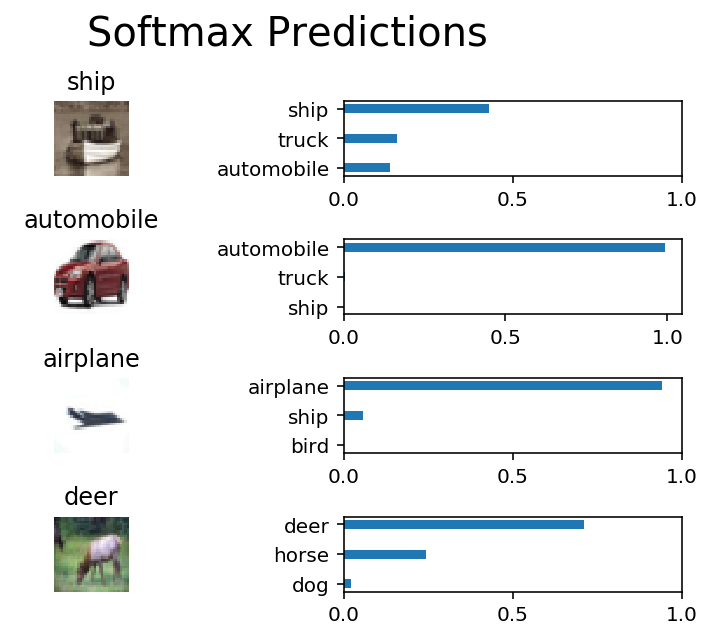

In [42]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## 为何准确率只有50-80%？

你可能想问，为何准确率不能更高了？首先，对于简单的 CNN 网络来说，50% 已经不低了。纯粹猜测的准确率为10%。但是，你可能注意到有人的准确率[远远超过 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130)。这是因为我们还没有介绍所有的神经网络知识。我们还需要掌握一些其他技巧。

## 提交项目

提交项目时，确保先运行所有单元，然后再保存记事本。将 notebook 文件另存为“dlnd_image_classification.ipynb”，再在目录 "File" -> "Download as" 另存为 HTML 格式。请在提交的项目中包含 “helper.py” 和 “problem_unittests.py” 文件。
